In [9]:
using JLD2
using FileIO
using Plots

In [21]:
# Read the costs and diameters of experiment data

points = load("../data/exhaustive_points.jld2", "points")[:,2:end]

diameters = zeros(5, 5, 5, 5, 5)
costs = zeros(5, 5, 5, 5, 5)

for i in axes(points, 2)
    coord = points[1, i]
    diameters[coord...] = points[2, i]
    costs[coord...] = points[3, i]
end

In [51]:
diameters[:] == points[2,:]

true

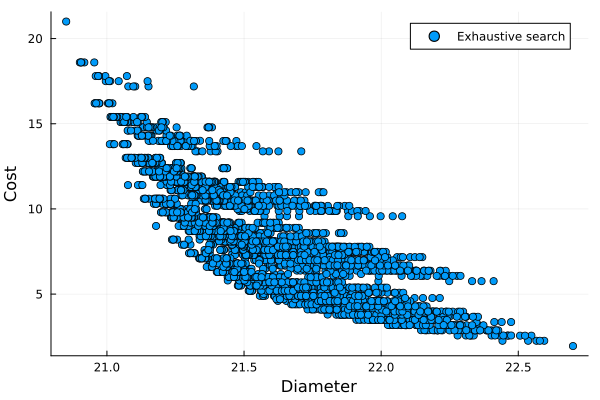

In [32]:
scatter(diameters[:], costs[:], xlabel="Diameter", ylabel="Cost", label="Exhaustive search")

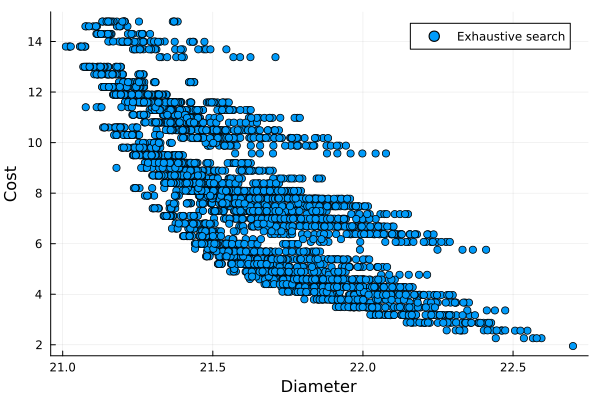

In [70]:
filter = costs .<= 15

scatter(diameters[filter][:], costs[filter][:], xlabel="Diameter", ylabel="Cost", label="Exhaustive search")

In [77]:
efficient_net_surfaces = (
    B0 = (acc1 = 77.1, acc5 = 93.3, para = 5.3, flop = 0.39),
    B1 = (acc1 = 79.1, acc5 = 94.4, para = 7.8, flop = 0.70),
    B2 = (acc1 = 80.1, acc5 = 94.9, para = 9.2, flop = 1.0),
    B3 = (acc1 = 81.6, acc5 = 95.7, para = 12, flop = 1.8),
    B4 = (acc1 = 82.9, acc5 = 96.4, para = 19, flop = 4.2),
    B5 = (acc1 = 83.6, acc5 = 96.7, para = 30, flop = 9.9),
    B6 = (acc1 = 84.0, acc5 = 96.8, para = 43, flop = 19),
    B7 = (acc1 = 84.3, acc5 = 97.0, para = 66, flop = 37),
)

efficient_net_map_full = vcat(([100/b.acc1 - 1;; 100/b.acc5 - 1;; b.flop] for b in efficient_net_surfaces)...)
efficient_net_map = efficient_net_map_full[1:5,2:3]

5×2 Matrix{Float64}:
 0.0718114  0.39
 0.059322   0.7
 0.0537408  1.0
 0.0449321  1.8
 0.0373444  4.2

In [85]:
# Split budget according to sensitivity
heuristic1(sensitivity, budget, tradeoff_map) = let
    state_budgets = budget / sum(sensitivity) .* sensitivity
    levels = ones(Int64, size(sensitivity))
end

# Increase highest rank first
heuristic2(sensitivity, budget, tradeoff_map) = let
    rankings = sortperm(sensitivity, rev=true)
    levels = ones(Int64, size(sensitivity))
    for state in rankings
        other_costs = sum(map(level -> tradeoff_map[level, 2], levels[1:end .!= state]))
        println(other_costs)
        while levels[state] < size(tradeoff_map, 1) && tradeoff_map[levels[state] + 1, 2] <= budget - other_costs
            levels[state] += 1
        end
        println(levels)
    end
    levels
end

heuristic2 (generic function with 1 method)

In [73]:
mult_sensitivity = [0.45, 0.29, 0.48, 0.68, 0.27]
addi_sensitivity = [0.35, 0.0, 0.23, 0.52, 0.32]
budget = 15

heuristic1(mult_sensitivity, budget)

5-element Vector{Float64}:
 3.110599078341014
 2.0046082949308754
 3.3179723502304146
 4.700460829493088
 1.8663594470046083

In [86]:
heuristic2(mult_sensitivity, budget, efficient_net_map)

1.56
[1, 1, 1, 5, 1]
5.37
[1, 1, 5, 5, 1]
9.18
[5, 1, 5, 5, 1]
12.990000000000002
[5, 4, 5, 5, 1]
14.399999999999999
[5, 4, 5, 5, 1]


5-element Vector{Int64}:
 5
 4
 5
 5
 1